In [33]:
#Let's start with importing packages
from qiskit import QuantumRegister, ClassicalRegister,QuantumCircuit, Aer, assemble, execute
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
import numpy as np

# import random_statevector to get a random two state quantum system     
from qiskit.quantum_info import random_statevector, Statevector


[-0.95312408-0.2389655j  -0.18498801-0.01514608j]


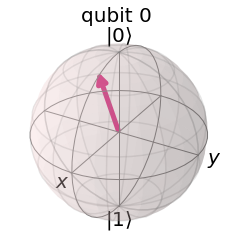

In [34]:
# Use random_statevector method to get a valid random statevector representing a qubit in superposition of two states 
rand_sv  = random_statevector(2).data
print(rand_sv) 
plot_bloch_multivector(rand_sv)

In [35]:
# Define a function to calculate and return the expectation values of X, Y and Z coordinates of a qubit vector situated 
# on a blochsphere, since qiskit measurement operation is set to measure in default 'Z' axis, in order to measure qubit 
# in 'X' and 'Y' direction/axis we have to rotate/adjust the final vector as it is measured in X and Y axis while performing 
# a default Z measurement.

def Exp_Value(axis):
    shots=10000
    qc = QuantumCircuit(1,1)
    qc.initialize(rand_sv,0)
    if (axis == 'Y') :  
        qc.sdg(0)
    if (axis == 'X' or axis == 'Y') :
        qc.h(0)
    qc.measure(0,0)
    bkend = Aer.get_backend('qasm_simulator')
    cnts = execute(qc,bkend,shots=shots).result().get_counts() 
    exp_val = (cnts['0'] * 1 + cnts['1']* -1 )/shots
    print('counts and exp. value for qubit system for', axis,' measurement ', cnts['0'], cnts['1'], exp_val)
    return exp_val


In [36]:
# The expectation values of X, Y and Z on same initial state is an indicator of average energy which is calculated with 
# the help of eigenvalues (discrete energy states)  obtained during the measurement in same repeated experiment.

ev_X = Exp_Value('X')
ev_Y = Exp_Value('Y')
ev_Z = Exp_Value('Z')

print(ev_X, ev_Y, ev_Z)

counts and exp. value for qubit system for X  measurement  6865 3135 0.373
counts and exp. value for qubit system for Y  measurement  4676 5324 -0.0648
counts and exp. value for qubit system for Z  measurement  9635 365 0.927
0.373 -0.0648 0.927


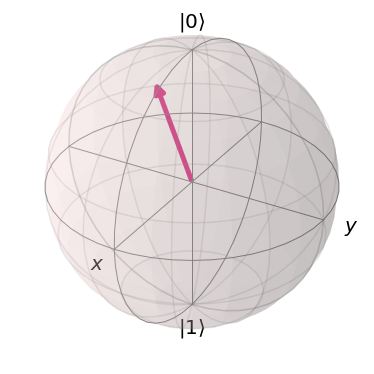

In [37]:
# let's plot the vector on blochsphere with help of cartesian  coordinates and see if we get same representation as 
# rand_sv
plot_bloch_vector([ev_X, ev_Y, ev_Z])

In [38]:
# lets calculate the spherical coordinates theta and phi as radius is 1
# since x = sin(θ)cos(φ), y = sin(θ)sin(φ) and z = cos(θ)
theta = np.arccos(ev_Z)
phi = np.arcsin(ev_Y/np.sin(theta))
print('theta, phi ', theta, phi)

theta, phi  0.3844629314511094 -0.1736430413691206


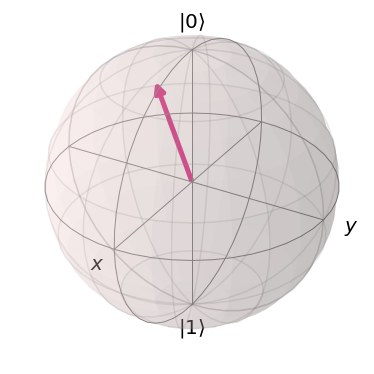

In [39]:
plot_bloch_vector([1, theta, phi], coord_type='spherical')

In [40]:
#lets calculate the vector associated with this value of theta and phi using standard qubit's representation 
# on blochsphere  
amp_zero = np.cos(theta/2)
amp_one = np.cos(phi)*np.sin(theta/2) + (np.sin(phi)*np.sin(theta/2)) * complex(0, 1)
q_sv = [amp_zero, amp_one]
print(q_sv)

[0.981580358401695, (0.18817670481926618-0.033007995445993685j)]


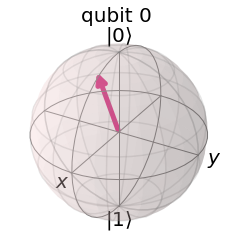

In [41]:
plot_bloch_multivector(q_sv) 

In [42]:
# lets measure the state_fidelity to check if both the states (rand_sv and q_sv) are in-fact same 
from qiskit.quantum_info import state_fidelity
print(rand_sv, q_sv)
state_fidelity(rand_sv, q_sv)

[-0.95312408-0.2389655j  -0.18498801-0.01514608j] [0.981580358401695, (0.18817670481926618-0.033007995445993685j)]


0.999966081441814

In [ ]:
# End of program #